In [7]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

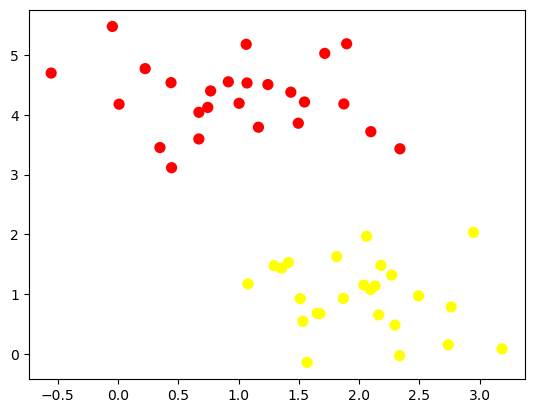

In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

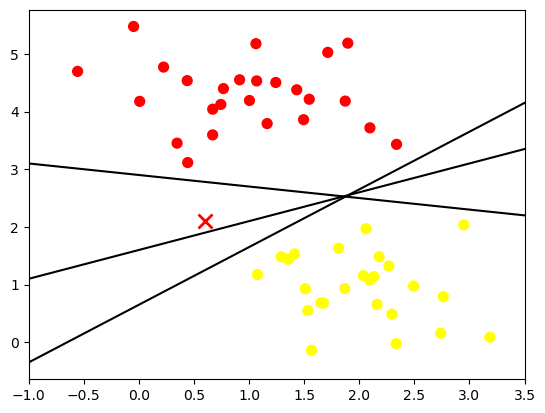

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

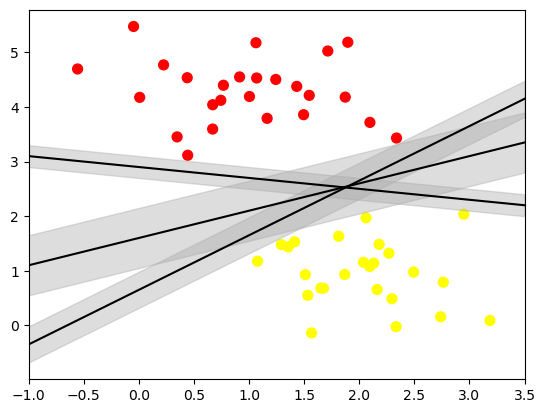

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [13]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

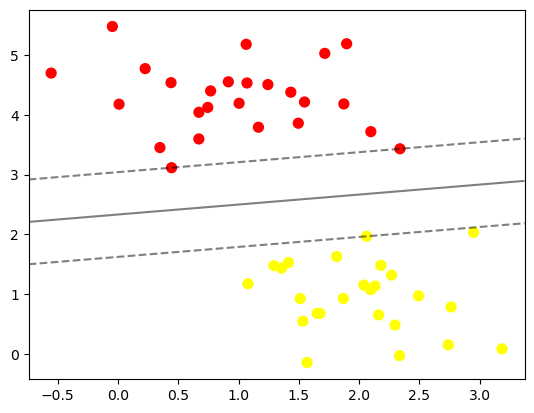

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [16]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[ 1.10137385e+00,  2.11147069e-01],
       [ 7.40571455e-01, -7.71464227e-01],
       [-8.70155202e-01, -1.78172166e-02],
       [-5.12869135e-01,  7.82484211e-01],
       [ 6.51486467e-01,  4.66635268e-01],
       [ 7.41852023e-01,  3.68020694e-01],
       [ 9.47617565e-01, -5.49030668e-01],
       [ 1.02860559e-03, -1.11700592e+00],
       [ 9.46835338e-01, -3.62338554e-02],
       [ 5.56472689e-01,  7.83007744e-01],
       [-8.56873720e-01, -6.59887750e-01],
       [-5.80699585e-01,  8.54060547e-01],
       [-8.70068310e-01,  1.85689839e-01],
       [ 8.00255746e-01,  7.74069843e-01],
       [-8.61509801e-01,  5.16289303e-01],
       [ 1.51702439e-01,  9.32647139e-01],
       [ 2.87468186e-01, -1.04459169e+00],
       [-1.04836002e+00,  3.15344909e-01],
       [-6.48307885e-01,  5.64531709e-01],
       [-6.22203191e-01, -7.01182478e-01],
       [-3.03986192e-01, -9.08776607e-01],
       [ 4.90298510e-01, -7.09724554e-01],
       [-1.94521409e-01,  1.03233837e+00],
       [-3.

NameError: name 'plot_svc_decision_function' is not defined

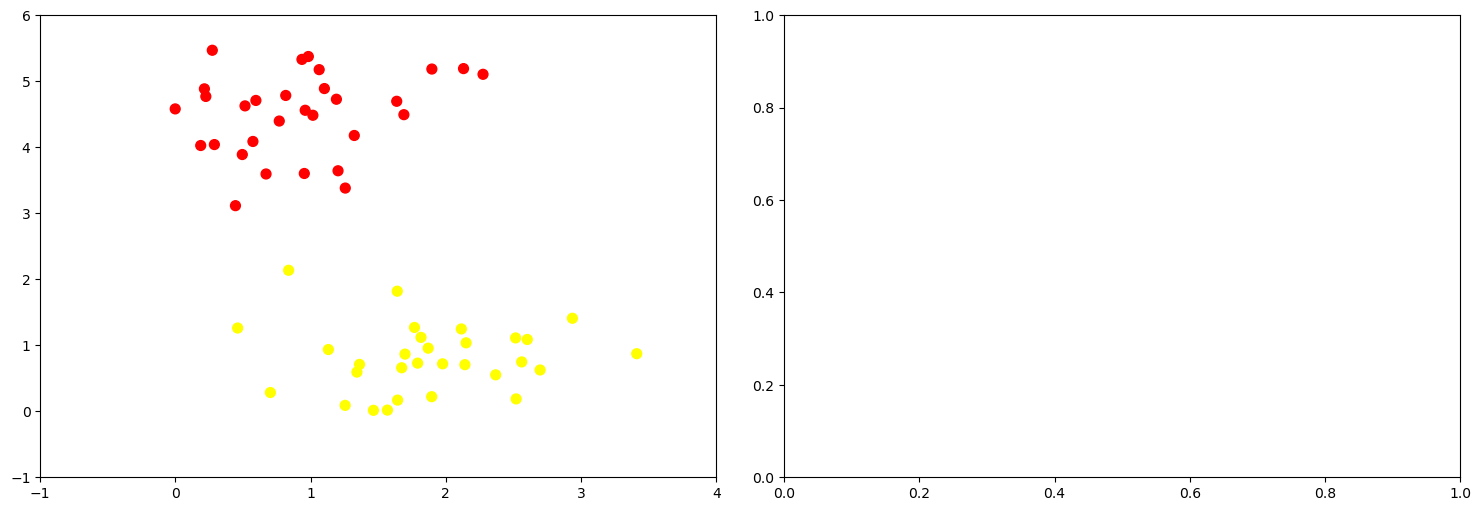

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

NameError: name 'plot_svc_decision_function' is not defined

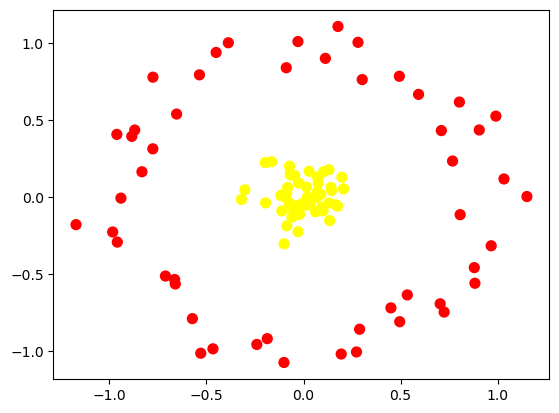

In [19]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [20]:
r = np.exp(-(X ** 2).sum(1))


In [21]:
from ipywidgets import interact, fixed

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.95899963, -0.29374445],
       [ 0.07052768,  0.03332838],
       [-1.17168226, -0.1804858 ],
       [ 0.16580952, -0.05169335],
       [ 0.49364016,  0.78286606],
       [ 0.10401826,  0.16288056],
       [ 0.03233164, -0.04073398],
       [-0.10072057, -1.07530735],
       [-0.24047151, -0.95832116],
       [ 0.01377008, -0.05481734],
       [ 0.06143324, -0.09630813],
       [-0.19557019, -0.03917889],
       [ 0.45006409, -0.72082817],
       [-0.11622739,  0.00910815],
       [-0.66055262, -0.56552019],
       [-0.06378138, -0.05448249],
       [-0.06741613,  0.14245621],
       [ 0.01524761,  0.06385513],
       [-0.65362513,  0.53750386],
       [-0.09372419, -0.00188838],
       [ 0.06765418, -0.00424541],
       [ 0.13491733, -0.15400964],
       [ 0.17751368,  1.1060597 ],
       [ 0.28058876,  1.00297271],
       [-0.08622299, -0.18805327],
       [-0.04537809,  0.13758816],
       [ 0.0752343 ,  0.08946596],
       [

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

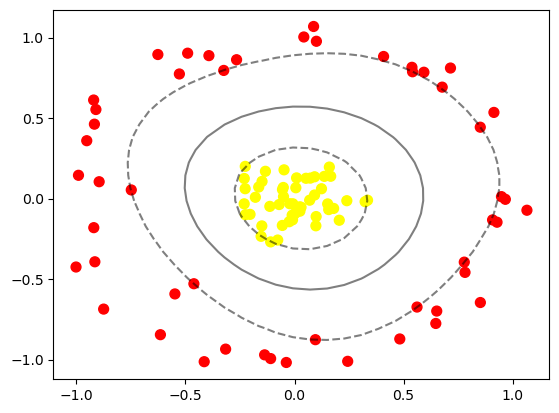

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

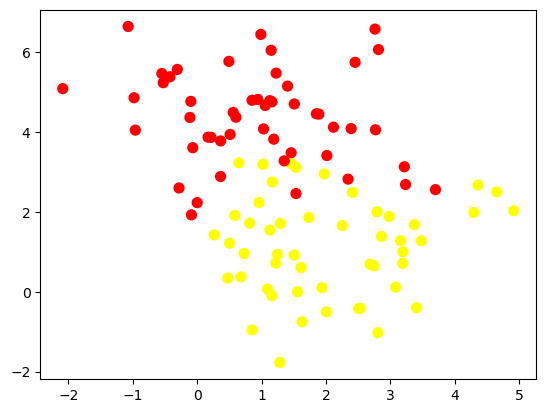

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

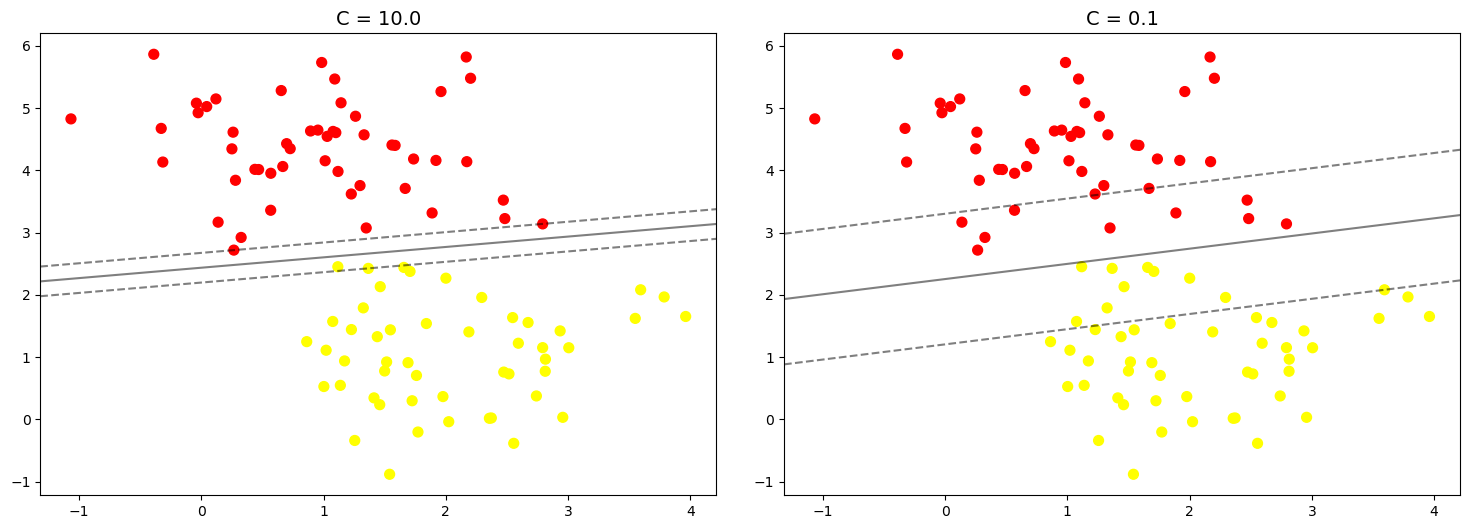

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)